# Ejercicio 1 - Generacion de Puts/Calls sinteticas / Busqueda de 'irregularidades'

### PROBLEMAS: 1) Se queire operar en un Put que no existe en el mercado por la razon de inversion/riesgo que sea, sin embargo dicho Put no esta en el mercado.  2) Se quiere arbitrar posibles desfazajes de Puts y Calls 


La idea de este ejercicio es tomar un ticker en el mercado (ARG o US), obtener el panel de opciones, completarlo con datos de tasa y de dividendos y 'completarlo' con las opciones que no esten disponibles en el mercado usando sinteticas ayudados de la relacion Put-Call parity.







## 1) Obtencion del panel de opciones de un ticker del mercado [Dificultad 1]

Para este paso pueden usar los modulos data_nyse o data_byma vistos en clase. Pueden usar la version clean del metodo o pueden generarse el panel como les guste, agregando columnas de mercado o generadas por ustedes.

Ejemplos 

Tickers
ARG: 'GGAL'
USA: 'AAPL'


## Empieza la resolucion. Importo los modulos que trabajamos en clase

In [34]:
import sys
sys.path.append('..')

from Codigo.data_nyse import *

import yfinance as yf
import datetime

### Para el caso NYSE, elijo un activo

In [35]:
ticker_nyse = 'TSLA' 
panel_opciones_nyse = obtener_panel_opciones_nyse(ticker_nyse, clean_flag=True)

In [36]:
panel_opciones_nyse.head(10)

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid
0,TSLA201009C00020000,TSLA,422.17,C,20.0,3,398.56,21.108500,12.671877,403.85,399.40
5661,TSLA201009P00020000,TSLA,422.17,P,20.0,3,0.01,21.108500,8.500005,0.01,0.00
1,TSLA201009C00040000,TSLA,422.17,C,40.0,3,385.83,10.554250,10.382816,384.25,379.60
5662,TSLA201009P00040000,TSLA,422.17,P,40.0,3,0.01,10.554250,6.500002,0.01,0.00
5663,TSLA201009P00060000,TSLA,422.17,P,60.0,3,0.01,7.036167,5.250003,0.01,0.00
2,TSLA201009C00080000,TSLA,422.17,C,80.0,3,263.20,5.277125,5.929690,343.80,338.95
5664,TSLA201009P00080000,TSLA,422.17,P,80.0,3,0.01,5.277125,4.500004,0.01,0.00
3,TSLA201009C00100000,TSLA,422.17,C,100.0,3,321.70,4.221700,6.240237,324.25,319.50
5665,TSLA201009P00100000,TSLA,422.17,P,100.0,3,0.01,4.221700,3.937500,0.01,0.00
4,TSLA201009C00240000,TSLA,422.17,C,240.0,3,180.61,1.759042,2.560550,184.10,179.50


## 2) Obtencion de curva de tasa para cada maturity o TTM o expiracion [Dificultad 2]

En clase hay un ejemplo de generacion de curva 'risk free' usando las tasas Libor e interpolandolas. Pueden usar otras curvas de descuento. En el caso Argentina pueden usar curva de caucion, curva Badlar, investigar el tema.Siguiendo con el dataframe del panel, se generaria una columna nueva con la tasa a usar para ese TTM/madurez. 

Ejemplos (guia, se pueden proponer otros)

USA:https://www.global-rates.com/interest-rates/libor/libor.aspx


ARG: 

BADLAR: https://www.bcra.gob.ar/PublicacionesEstadisticas/Principales_variables_datos.asp?serie=1222&detalle=BADLAR%20en%20pesos%20de%20bancos%20privados%20(en%20%%20n.a.)

CAUCIONES: https://www.invertironline.com/mercado/cotizaciones/argentina/cauciones



### Tomo el caso USA (curvas Libor) interpoladas. Es un modelito bastante basico y con fallas, pero puede servir para una primera aproximacion

In [37]:
#AQUI CODIGO


#Libor
#https://es.global-rates.com/tipos-de-interes/libor/dolar-usa/dolar-usa.aspx
#Ad hoc curve de tasas:

import numpy as np

Dias = np.array([1, 7, 30, 60, 91, 182, 365])

Tasas = np.array([0.0008125,
                 0.0009275,
                 0.0014,
                 0.0018038,
                 0.002335,
                 0.0024475,
                 0.003575])

curva = np.vstack((Dias, Tasas)).T

from scipy import interpolate
curva_interp = interpolate.interp1d(Dias, Tasas, fill_value='extrapolate')


#Cargo la tasa en una columna
panel_opciones_nyse['Tasa'] = curva_interp(panel_opciones_nyse['TTM'])


## 3) Obtencion de dividendo / curva de dividendos para cada maturity o TTM o expiracion [Dificultad 1-2]

En clase hay un ejemplo de obtencion del dividend yield usando yfinance. Pueden usar otros modelos que usen las fechas de los posibles pagos de dividendos y la estimacion u otras fuentes de datos para el caso Argentino. Siguiendo con el dataframe del panel, se generaria una columna nueva con el dividend yield a usar para ese TTM/madurez.

ARG: 
https://es.investing.com/equities/grupo-financiero-galicia-sa-adr-dividends

US (modulo yfinance): 
ticker = 'AAPL'
data = yf.Ticker(ticker)
div = float(data.info['dividendYield'])



### Trabajo en USA, y traigo el dividend yield de yahoo.

In [38]:
#AQUI CODIGO


data = yf.Ticker(ticker_nyse) 
try:
    div = float(data.info['dividendYield'])
except:
    div = 0.0


#Cargo el dividendo en una columna
panel_opciones_nyse['Div'] = div
div



0.0

In [56]:
panel_opciones_nyse

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid,Tasa,Div,Precio_Avg,Sintetico_tipo,Sintetico_precio
5661,TSLA201009P00020000,TSLA,422.17,P,20.0,3,0.01,21.108500,8.500005,0.01,0.0,0.000851,0.0,0.005,C,402.175140
5662,TSLA201009P00040000,TSLA,422.17,P,40.0,3,0.01,10.554250,6.500002,0.01,0.0,0.000851,0.0,0.005,C,382.175280
5663,TSLA201009P00060000,TSLA,422.17,P,60.0,3,0.01,7.036167,5.250003,0.01,0.0,0.000851,0.0,0.005,C,362.175420
5664,TSLA201009P00080000,TSLA,422.17,P,80.0,3,0.01,5.277125,4.500004,0.01,0.0,0.000851,0.0,0.005,C,342.175559
5665,TSLA201009P00100000,TSLA,422.17,P,100.0,3,0.01,4.221700,3.937500,0.01,0.0,0.000851,0.0,0.005,C,322.175699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,TSLA230120C00830000,TSLA,422.17,C,830.0,836,101.13,0.508639,0.748530,108.05,100.1,0.006477,0.0,104.075,P,499.682977
5658,TSLA230120C00850000,TSLA,422.17,C,850.0,836,103.11,0.496671,0.750788,106.00,98.5,0.006477,0.0,102.250,P,517.563470
5659,TSLA230120C00870000,TSLA,422.17,C,870.0,836,100.00,0.485253,0.744647,101.25,95.5,0.006477,0.0,98.375,P,533.393964
5660,TSLA230120C00900000,TSLA,422.17,C,900.0,836,96.00,0.469078,0.750178,97.90,95.0,0.006477,0.0,96.450,P,561.027204


## 4) Buscar Calls para las que no haya Puts (o Puts para las que no haya Calls) en el panel y generarl aproximaciones sinteticamente usando la paridad Put Call para tener un panel 'completo'  [Dificultad 2]

En el caso de una Europea con tasa de dividendos div: $$C(0)-P(0) = S(0)e^{-divT} - K e^{-rT}$$ 


Mas de Put-Call parity: https://financialmathmodels.wordpress.com/2015/05/16/put-call-parity-part-2/

### Mi approach para mostrarles hoy es 'fuerza-bruta' pero vi resoluciones mas piolas que solo se quedaban con aquellas opciones que no tenian par

### Agrego columnas de precio medio (que no venia en la base) y del tipo de opcion 'sintetica' y del precio de la misma - que calculare usando PC Parity

In [39]:
#AQUI CODIGO

import math
panel_opciones_nyse['Precio_Avg'] = (panel_opciones_nyse.Bid+panel_opciones_nyse.Ask)/2
panel_opciones_nyse['Sintetico_tipo'] = ''
panel_opciones_nyse['Sintetico_precio'] = 0.0
#panel_opciones_nyse = panel_opciones_nyse.sort_values(by=['TTM','Strike'], inplace=False )

#panel_opciones_nyse.drop(['index'],axis=1, inplace=True)
panel_opciones_nyse.head(10)

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid,Tasa,Div,Precio_Avg,Sintetico_tipo,Sintetico_precio
0,TSLA201009C00020000,TSLA,422.17,C,20.0,3,398.56,21.108500,12.671877,403.85,399.40,0.000851,0.0,401.625,,0.0
5661,TSLA201009P00020000,TSLA,422.17,P,20.0,3,0.01,21.108500,8.500005,0.01,0.00,0.000851,0.0,0.005,,0.0
1,TSLA201009C00040000,TSLA,422.17,C,40.0,3,385.83,10.554250,10.382816,384.25,379.60,0.000851,0.0,381.925,,0.0
5662,TSLA201009P00040000,TSLA,422.17,P,40.0,3,0.01,10.554250,6.500002,0.01,0.00,0.000851,0.0,0.005,,0.0
5663,TSLA201009P00060000,TSLA,422.17,P,60.0,3,0.01,7.036167,5.250003,0.01,0.00,0.000851,0.0,0.005,,0.0
2,TSLA201009C00080000,TSLA,422.17,C,80.0,3,263.20,5.277125,5.929690,343.80,338.95,0.000851,0.0,341.375,,0.0
5664,TSLA201009P00080000,TSLA,422.17,P,80.0,3,0.01,5.277125,4.500004,0.01,0.00,0.000851,0.0,0.005,,0.0
3,TSLA201009C00100000,TSLA,422.17,C,100.0,3,321.70,4.221700,6.240237,324.25,319.50,0.000851,0.0,321.875,,0.0
5665,TSLA201009P00100000,TSLA,422.17,P,100.0,3,0.01,4.221700,3.937500,0.01,0.00,0.000851,0.0,0.005,,0.0
4,TSLA201009C00240000,TSLA,422.17,C,240.0,3,180.61,1.759042,2.560550,184.10,179.50,0.000851,0.0,181.800,,0.0


### Ahora es donde las lleno usando paridad put call - me quedo con aquellos precios positivos y me saco de encima precios negativos (puede haber)

In [40]:

for idx in panel_opciones_nyse.index:
    if panel_opciones_nyse.CallPut.values[idx] == 'C':
        #print('Sintetico es Put')
        panel_opciones_nyse.Sintetico_tipo.values[idx] = 'P'
        panel_opciones_nyse.Sintetico_precio.values[idx] = panel_opciones_nyse.Precio_Avg.values[idx] - panel_opciones_nyse.Spot.values[idx] * math.exp(-panel_opciones_nyse.Div.values[idx] * panel_opciones_nyse.TTM.values[idx]/365) + panel_opciones_nyse.Strike.values[idx] * math.exp(-panel_opciones_nyse.Tasa.values[idx] * panel_opciones_nyse.TTM.values[idx]/365) 
    else:
        #print('Sintetico es Call')
        panel_opciones_nyse.Sintetico_tipo.values[idx] = 'C'
        panel_opciones_nyse.Sintetico_precio.values[idx] = panel_opciones_nyse.Precio_Avg.values[idx] + panel_opciones_nyse.Spot.values[idx] * math.exp(-panel_opciones_nyse.Div.values[idx] * panel_opciones_nyse.TTM.values[idx]/365) - panel_opciones_nyse.Strike.values[idx] * math.exp(-panel_opciones_nyse.Tasa.values[idx] * panel_opciones_nyse.TTM.values[idx]/365) 
panel_opciones_nyse = panel_opciones_nyse[panel_opciones_nyse.Sintetico_precio>0]  



In [41]:
panel_opciones_nyse


,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid,Tasa,Div,Precio_Avg,Sintetico_tipo,Sintetico_precio
5661,TSLA201009P00020000,TSLA,422.17,P,20.0,3,0.01,21.108500,8.500005,0.01,0.0,0.000851,0.0,0.005,C,402.175140
5662,TSLA201009P00040000,TSLA,422.17,P,40.0,3,0.01,10.554250,6.500002,0.01,0.0,0.000851,0.0,0.005,C,382.175280
5663,TSLA201009P00060000,TSLA,422.17,P,60.0,3,0.01,7.036167,5.250003,0.01,0.0,0.000851,0.0,0.005,C,362.175420
5664,TSLA201009P00080000,TSLA,422.17,P,80.0,3,0.01,5.277125,4.500004,0.01,0.0,0.000851,0.0,0.005,C,342.175559
5665,TSLA201009P00100000,TSLA,422.17,P,100.0,3,0.01,4.221700,3.937500,0.01,0.0,0.000851,0.0,0.005,C,322.175699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,TSLA230120C00830000,TSLA,422.17,C,830.0,836,101.13,0.508639,0.748530,108.05,100.1,0.006477,0.0,104.075,P,499.682977
5658,TSLA230120C00850000,TSLA,422.17,C,850.0,836,103.11,0.496671,0.750788,106.00,98.5,0.006477,0.0,102.250,P,517.563470
5659,TSLA230120C00870000,TSLA,422.17,C,870.0,836,100.00,0.485253,0.744647,101.25,95.5,0.006477,0.0,98.375,P,533.393964
5660,TSLA230120C00900000,TSLA,422.17,C,900.0,836,96.00,0.469078,0.750178,97.90,95.0,0.006477,0.0,96.450,P,561.027204


In [57]:
TTMs = list(set(panel_opciones_nyse.TTM))
TTMs.sort()
TTMs

[3,
 10,
 17,
 24,
 31,
 38,
 45,
 73,
 101,
 136,
 164,
 255,
 283,
 346,
 472,
 528,
 619,
 710,
 836]

In [58]:
panel_opciones_nyse[panel_opciones_nyse['TTM']==TTMs[2]]

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid,Tasa,Div,Precio_Avg,Sintetico_tipo,Sintetico_precio
6479,TSLA201023P00020000,TSLA,422.17,P,20.0,17,0.01,21.108500,3.937500,0.01,0.00,0.001133,0.0,0.005,C,402.176055
6480,TSLA201023P00050000,TSLA,422.17,P,50.0,17,0.01,8.443400,2.750003,0.01,0.00,0.001133,0.0,0.005,C,372.177638
6481,TSLA201023P00100000,TSLA,422.17,P,100.0,17,0.03,4.221700,2.148442,0.04,0.03,0.001133,0.0,0.035,C,322.210277
6482,TSLA201023P00150000,TSLA,422.17,P,150.0,17,0.11,2.814467,1.746095,0.20,0.03,0.001133,0.0,0.115,C,272.292915
6483,TSLA201023P00200000,TSLA,422.17,P,200.0,17,0.16,2.110850,1.335941,0.23,0.10,0.001133,0.0,0.165,C,222.345553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,TSLA201023C00720000,TSLA,422.17,C,720.0,17,0.34,0.586347,1.006841,0.44,0.23,0.001133,0.0,0.335,P,298.127009
888,TSLA201023C00740000,TSLA,422.17,C,740.0,17,0.20,0.570500,1.045903,0.50,0.15,0.001133,0.0,0.325,P,318.115954
889,TSLA201023C00760000,TSLA,422.17,C,760.0,17,0.28,0.555487,1.032231,0.29,0.12,0.001133,0.0,0.205,P,337.994898
890,TSLA201023C00780000,TSLA,422.17,C,780.0,17,0.20,0.541244,1.040044,0.26,0.05,0.001133,0.0,0.155,P,357.943843


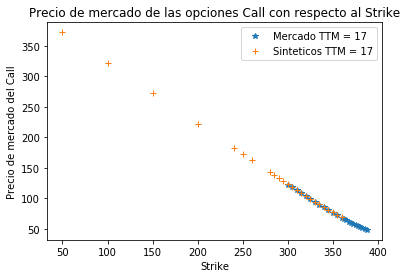

In [52]:
CP = "C"
TTM = TTMs[2]

precios_mercado=[]
precios_sinteticos=[]

from matplotlib import pyplot as plt
Ks1 = panel_opciones_nyse[(panel_opciones_nyse.TTM == TTM) & (panel_opciones_nyse.CallPut == CP)].Strike.values
precios_mercado = panel_opciones_nyse[(panel_opciones_nyse.TTM == TTM) & (panel_opciones_nyse.CallPut == CP)].Precio_Avg.values

Ks2 = panel_opciones_nyse[(panel_opciones_nyse.TTM == TTM) & (panel_opciones_nyse.Sintetico_tipo == CP)].Strike.values
precios_sinteticos = panel_opciones_nyse[(panel_opciones_nyse.TTM == TTM) & (panel_opciones_nyse.Sintetico_tipo == CP)].Sintetico_precio.values


n=25

plt.plot(Ks1[1:n], precios_mercado[1:n],'*', label='Mercado TTM = '+str(TTM))
plt.plot(Ks2[1:n], precios_sinteticos[1:n],'+', label='Sinteticos TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()

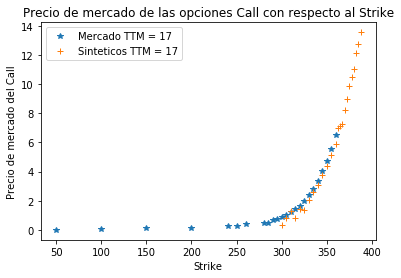

In [55]:
CP = "P"
TTM =TTMs[2]

precios_mercado=[]
precios_sinteticos=[]

from matplotlib import pyplot as plt
Ks1 = panel_opciones_nyse[(panel_opciones_nyse.TTM == TTM) & (panel_opciones_nyse.CallPut == CP)].Strike.values
precios_mercado = panel_opciones_nyse[(panel_opciones_nyse.TTM == TTM) & (panel_opciones_nyse.CallPut == CP)].Precio_Avg.values

Ks2 = panel_opciones_nyse[(panel_opciones_nyse.TTM == TTM) & (panel_opciones_nyse.Sintetico_tipo == CP)].Strike.values
precios_sinteticos = panel_opciones_nyse[(panel_opciones_nyse.TTM == TTM) & (panel_opciones_nyse.Sintetico_tipo == CP)].Sintetico_precio.values

n=25

plt.plot(Ks1[1:n], precios_mercado[1:n],'*', label='Mercado TTM = '+str(TTM))
plt.plot(Ks2[1:n], precios_sinteticos[1:n],'+', label='Sinteticos TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()

## 5) Para aquellos pares que si hay tanto Put como Call, analizar si se cumple la relacion y proponer alguna estrategia que podria arbitrar la irregularidad [Dificultad 3]

In [ ]:
#AQUI CODIGO